Reference: https://cloud.tencent.com/developer/article/1736532

## 1. Ways of Radar Scanning

### 1.1 PPI (Plain Position Indicator)
Fixed Angle then rotate the radar antena to scan

- PPI image reflect the echo from large range of precip system, mkae short time forecast easier
- PPI data helps on estimating the volume of precipitation

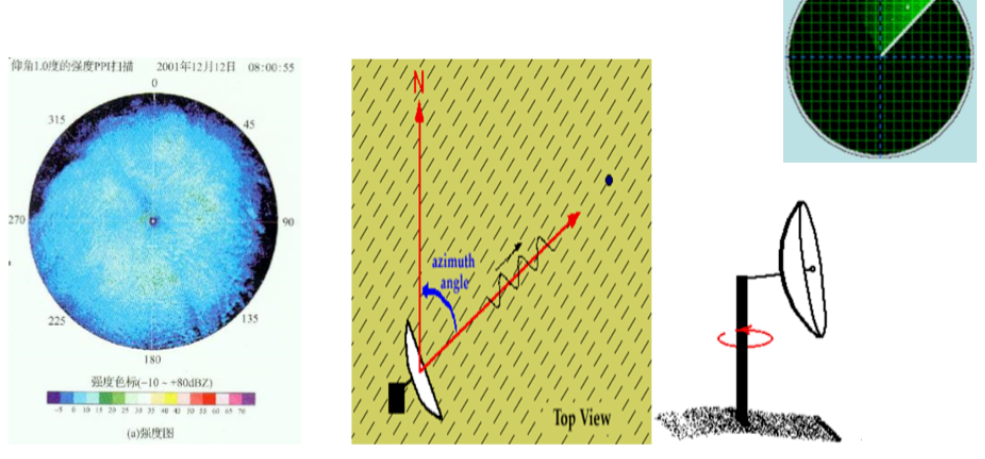

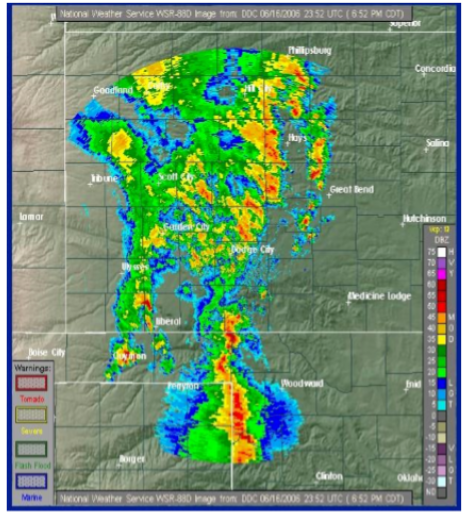

### 1.2 RHI (Range Height Indicator)
Fix Azimuth then scan up and down

- good to understand the precipitations development vertically
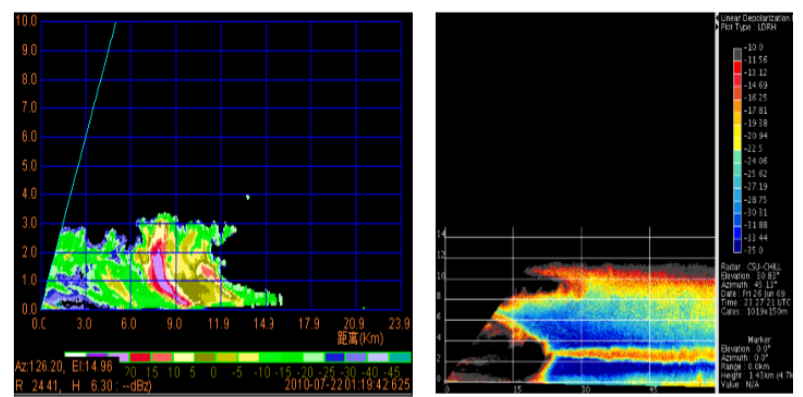

- with RHI we can clearly see the vertical structure of the precipitations. It also helps to see the trend of echo's apear and disapear. RHI is the most important data on searching precipitation system.
- images beow. on the left shows weather is disapear gradually; on the right, it could get stronger.
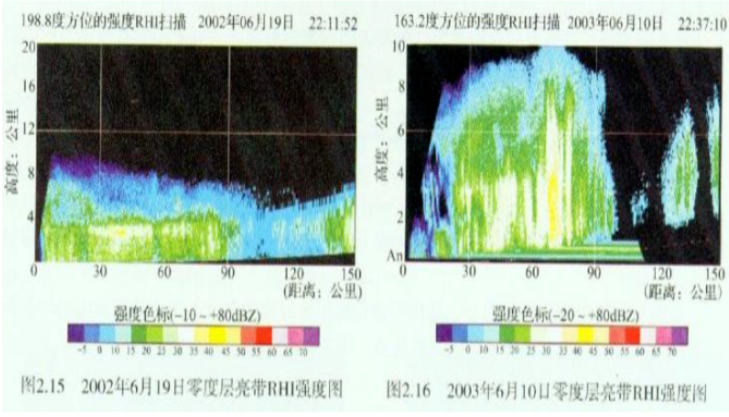

### 1.3 VPPI (Volumetric PPI)
- Combined PPI data from different Azimuth
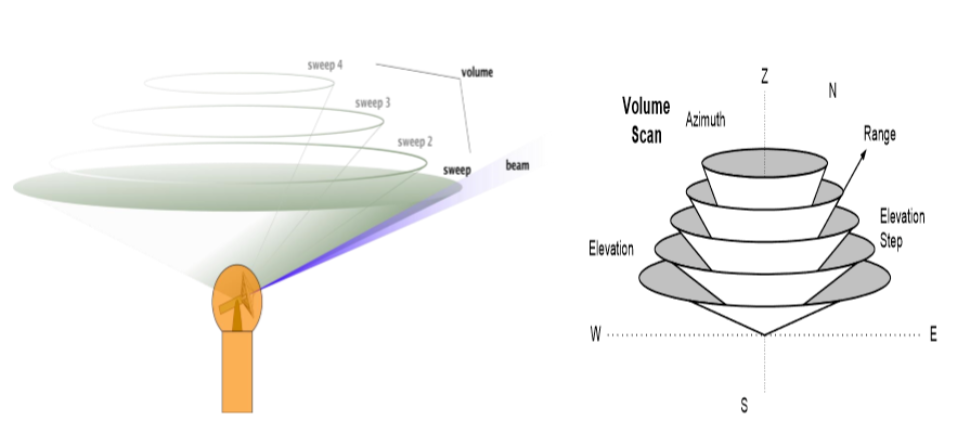

- Different Azimuth PPI returns from same precip system. Bottom right shows the angle of Azimuth
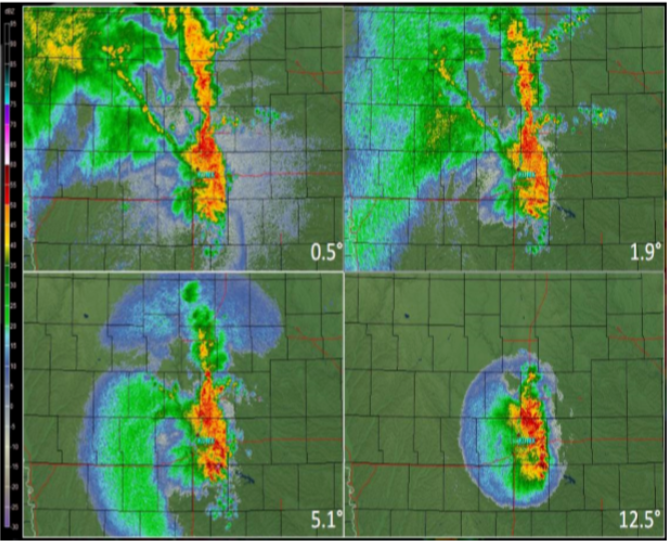

### 1.4 THI (Time Height Indicator)
It is using to scan the echo returns from the top of radar station. Milimeter Cloud detect radar always does this way.
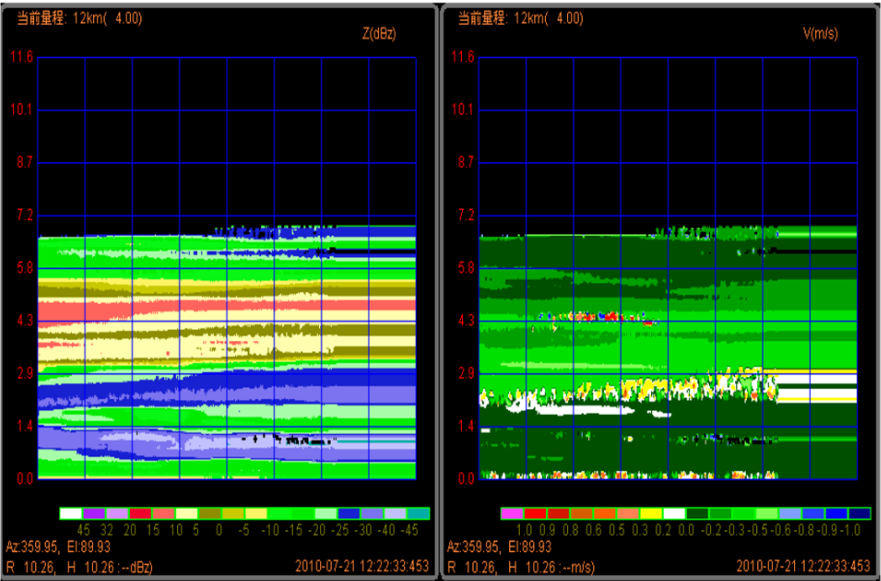

Radar will use VPPI scan in regular business. the Radar will start from the lowest Azimuth whihc is Zero Angle (North is 0 degree, East is 90 degree. Azimuth is zero when Antenna is parallel with sea surface, and 90 degree when Antenna facing sky.
the antenna will rotate clockwise and finish whole layer scan for every azimuth 
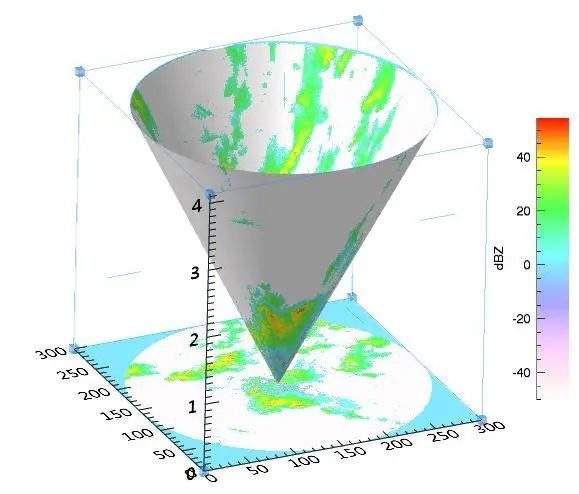

## 2. Access Basic Radar Information with Python

### 2.1 Libraries

In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#------------------------------------------------------
#https://arm-doe.github.io/pyart/
import pyart
import os
os.environ['PROJ_LIB'] = 'C:/Users/wangt/.conda/envs/pt/Library/share/proj'

### 2.2 Load Level II Radar from AWS

In [26]:
#aws_l2 = ("s3://noaa-nexrad-level2/2023/08/31/KAKQ/KAKQ20230831_001659_V06")
aws_l2 = ("s3://noaa-nexrad-level2/2023/08/31/KAMX/KAMX20230831_002121_V06")

radar1 = pyart.io.read_nexrad_archive(aws_l2)

### 2.3 Radar Parameters

### 2.3.1 Fields

In [27]:
radar1.fields

{'reflectivity': {'units': 'dBZ',
  'standard_name': 'equivalent_reflectivity_factor',
  'long_name': 'Reflectivity',
  'valid_max': 94.5,
  'valid_min': -32.0,
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(
    data=[[-4.0, -1.0, 1.5, ..., --, --, --],
          [-0.5, 7.0, 3.0, ..., --, --, --],
          [2.0, -1.0, 4.5, ..., --, --, --],
          ...,
          [-18.0, -12.0, -12.5, ..., --, --, --],
          [-9.5, -5.5, -10.5, ..., --, --, --],
          [-11.0, -7.0, -12.0, ..., --, --, --]],
    mask=[[False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          ...,
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32)},
 'velocity': {'units': 'meters_per

In [28]:
radar1.fields.keys()

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'differential_phase', 'cross_correlation_ratio', 'clutter_filter_power_removed', 'differential_reflectivity'])

### 2.3.2 Station Information

In [5]:
# location info of Radar station
station_lat = radar1.latitude
station_lon = radar1.longitude
station_alt = radar1.altitude
print(station_lat)
print(station_lon)
print(station_alt)

{'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([36.98405075])}
{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([-77.00736237])}
{'long_name': 'Altitude', 'standard_name': 'Altitude', 'units': 'meters', 'positive': 'up', 'data': array([77.])}


### 2.3.3 Radar Scan Angles

In [6]:
# Beam Elevation Angles
print(radar1.elevation )

{'units': 'degrees', 'standard_name': 'beam_elevation_angle', 'long_name': 'elevation_angle_from_horizontal_plane', 'axis': 'radial_elevation_coordinate', 'comment': 'Elevation of antenna relative to the horizontal plane', 'data': array([ 0.5685425 ,  0.5630493 ,  0.57403564, ..., 12.436523  ,
       12.436523  , 12.436523  ], dtype=float32)}


In [9]:
#beam_azimuth_angle
print(radar1.azimuth )

{'units': 'degrees', 'standard_name': 'beam_azimuth_angle', 'long_name': 'azimuth_angle_from_true_north', 'axis': 'radial_azimuth_coordinate', 'comment': 'Azimuth of antenna relative to true north', 'data': array([301.20941162, 301.7175293 , 302.19268799, ...,  55.48919678,
        56.50543213,  57.49694824])}


In [12]:
ele = 0
radius = 400 #400km for the map
# get the reflect rate data
r = radar1.get_data(ele,radius."REF")
print(r)

SyntaxError: invalid syntax (2680911287.py, line 4)

In [13]:
radar1.scan_type

'ppi'

In [15]:
print(radar1.metadata)

{'Conventions': 'CF/Radial instrument_parameters', 'version': '1.3', 'title': '', 'institution': '', 'references': '', 'source': '', 'history': '', 'comment': '', 'instrument_name': 'KAKQ', 'original_container': 'NEXRAD Level II', 'vcp_pattern': 212}


In [17]:
print(radar1. projection)

{'proj': 'pyart_aeqd', '_include_lon_0_lat_0': True}


C:\Users\wangt\.conda\envs\ml\lib\site-packages\pyart\graph\radarmapdisplay.py:285: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  UserWarning)


ValueError: i is not a valid Natural Earth scale. Valid scales are "110m", "50m", and "10m".

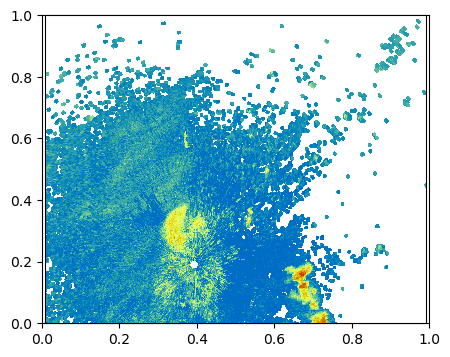

In [34]:
#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar1)
#create a Matplotlib figure
f = plt.figure(figsize = [17,4])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
#plt.subplot(1, 3, 1) 
#display.plot_ppi_map('differential_reflectivity', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
#                     vmin = -7, vmax = 7, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
#                     resolution = 'i')
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'i')
plt.subplot(1, 3, 3) 
display.plot_ppi_map('velocity', sweep = 1, max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -15, vmax = 15, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'i')

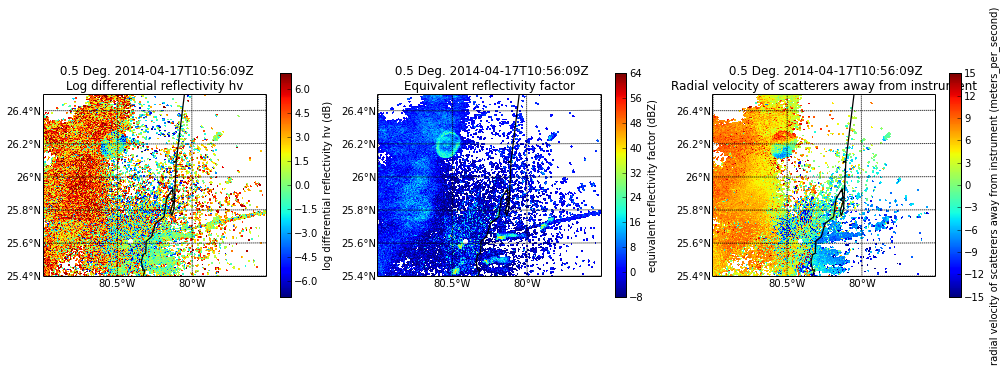

C:\Users\wangt\.conda\envs\ml\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\wangt\.conda\envs\ml\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


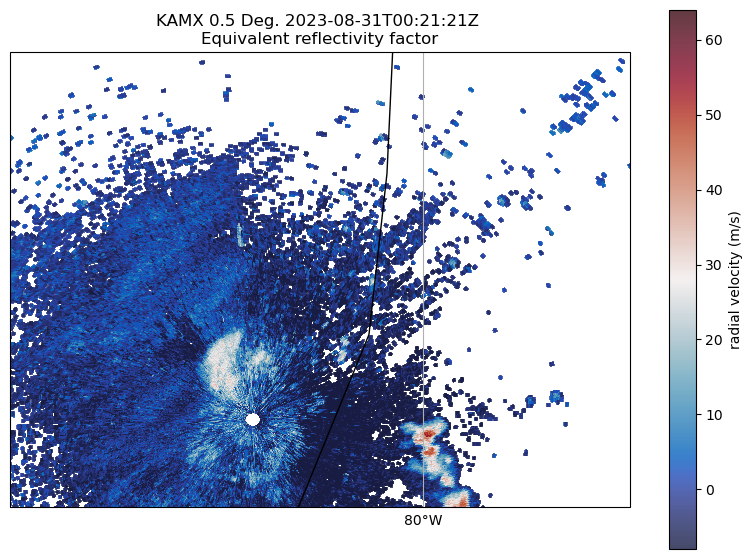

In [37]:
fig = plt.figure(figsize=(10, 7))
display = pyart.graph.RadarMapDisplay(radar1)
display.plot_ppi_map(
    "reflectivity",
    alpha=0.8,
    sweep=0,
    vmin=-8,
    vmax=64,
    projection=ccrs.PlateCarree(),
    colorbar_label="radial velocity (m/s)",
    cmap="pyart_balance",
)

plt.xlim(-81, -79.5) 
plt.ylim(25.4, 26.5) 
plt.show()